<a href="https://colab.research.google.com/github/ylmgrbzz/DiabetesPrediction-With-LogisticRegression-RandomForest-GBM-XGBoost-LightGBM-CATBoost-KNN-SVM-ANN/blob/main/Diabetes_Prediction_With_LogisticRegression_RandomForest_GBM_XGBoost_LightGBM_CATBoost_KNN_SVM_ANN_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,mean_squared_error, r2_score,classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from sklearn.svm import SVC

In [2]:
from warnings import filterwarnings 
filterwarnings("ignore")

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df["Outcome"].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1)

In [7]:
y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)


In [10]:
loj_model.intercept_


array([-5.89182337])

In [11]:
loj_model.coef_


array([[ 1.17051909e-01,  2.83882398e-02, -1.68895484e-02,
         7.55589576e-04, -6.42808920e-04,  5.97634539e-02,
         6.77607988e-01,  7.24042917e-03]])

In [12]:

loj_model.predict(X)[0:10]


array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [13]:

y[0:10]


0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [14]:
y_pred=loj_model.predict(X)


In [15]:
confusion_matrix(y,y_pred)


array([[448,  52],
       [121, 147]])

In [16]:
accuracy_score(y,y_pred) 


0.7747395833333334

In [17]:
print(classification_report(y,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,  random_state=42)

In [19]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)


In [20]:
y_pred = loj_model.predict(X_test)


In [21]:
print(accuracy_score(y_test,y_pred))


0.7532467532467533


In [22]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()


0.7748188405797102

In [23]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)


In [24]:
knn_model


KNeighborsClassifier()

In [25]:
y_pred=knn_model.predict(X_test)


In [26]:



print(accuracy_score(y_test,y_pred))


0.6883116883116883


In [27]:

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [28]:


knn = KNeighborsClassifier()


In [29]:
knn_params = {"n_neighbors": np.arange(1,50)}


In [30]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)


In [31]:
knn_cv_model.best_params_


{'n_neighbors': 11}

In [32]:
knn_cv_model.best_score_


0.748637316561845

In [33]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(X_train,y_train)


In [34]:
y_pred = knn_tuned.predict(X_test)


In [35]:
print(accuracy_score(y_test,y_pred))


0.7316017316017316


In [36]:
svm_model = SVC(kernel = "linear").fit(X_train,y_train)


In [37]:
svm_model


SVC(kernel='linear')

In [38]:
y_pred=svm_model.predict(X_test)


In [39]:
accuracy_score(y_test,y_pred)


0.7445887445887446

In [40]:
svm_model = SVC()
svm_params = {"C": np.arange(1,10),
             "kernel":["linear","rbf"]}
svm_cv_model=GridSearchCV(svm_model,svm_params,cv=5).fit(X_train,y_train)

In [41]:
svm_cv_model.best_params_


{'C': 2, 'kernel': 'linear'}

In [42]:
svm_cv_model.best_score_


0.7839044652128765

In [43]:

svm_tuned = SVC(kernel="linear",C=2).fit(X_train,y_train)


In [44]:
y_pred = svm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

In [49]:
mlp_model = MLPClassifier().fit(X_train,y_train)


In [50]:
mlp_model.coefs_


[array([[ 1.48158113e-01, -1.81965276e-02, -1.35006385e-01,
         -1.66678534e-01, -8.27424484e-02,  7.41525257e-07,
         -8.91073605e-02,  5.97343884e-02,  1.48887584e-01,
         -2.06807814e-01, -1.58383253e-01,  1.96056193e-02,
         -5.54309467e-02, -2.29637349e-04, -1.31957118e-01,
          1.89880132e-03,  2.94625613e-01,  1.52542723e-01,
          2.20809072e-01, -1.34529839e-03,  4.15114517e-02,
         -3.74170109e-02, -1.85173925e-01,  4.82482977e-01,
         -2.26016073e-02, -1.40474961e-12,  2.06647968e-01,
          2.25237069e-01, -1.21931737e-01, -2.20194516e-02,
          1.77201664e-01,  3.59386487e-01, -1.70806521e-01,
          1.93956111e-04, -1.46478787e-01,  9.03798713e-02,
          1.60434573e-02, -3.72386623e-02,  1.80021536e-01,
          1.67955455e-01,  2.86359665e-03,  1.94161842e-01,
          2.22051652e-03,  7.57691742e-02,  1.03168086e-02,
         -1.06889949e-01,  1.61437160e-01, -7.77448839e-02,
          1.37088983e-01, -1.85544710e-0

In [51]:
mlp_model


MLPClassifier()

In [52]:
y_pred=mlp_model.predict(X_test)


In [53]:
accuracy_score(y_test,y_pred)


0.7186147186147186

In [54]:
mlp_params = {"alpha" : [5,0.1,0.01],
             "hidden_layer_sizes": [(100,100,100),(100,100)]}

In [55]:
mlpc = MLPClassifier(solver="lbfgs",activation="logistic")
mlp_cv_model = GridSearchCV(mlpc,mlp_params,cv=5,verbose = 2,n_jobs =-1).fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [56]:
mlp_cv_model.best_params_


{'alpha': 5, 'hidden_layer_sizes': (100, 100)}

In [57]:
mlp_tuned = MLPClassifier(solver="lbfgs",activation="logistic",
                          alpha=5,hidden_layer_sizes=(100,100)).fit(X_train,y_train)

In [58]:
y_pred=mlp_tuned.predict(X_test)


In [59]:
accuracy_score(y_test,y_pred)


0.7489177489177489

In [60]:
cart_model = DecisionTreeClassifier().fit(X_train,y_train)


In [61]:
cart_model

DecisionTreeClassifier()

In [62]:
y_pred = cart_model.predict(X_test)


In [63]:
accuracy_score(y_test,y_pred)


0.696969696969697

In [64]:
cart_model = DecisionTreeClassifier()


In [65]:
cart_params = {"max_depth":[1,3,4,5,10],
               "min_samples_split":[2,10,5,30]}

In [66]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)


In [67]:
cart_cv_model.best_params_


{'max_depth': 5, 'min_samples_split': 30}

In [68]:
cart_tuned = DecisionTreeClassifier(max_depth=5,min_samples_split=30).fit(X_train,y_train)


In [69]:
y_pred = cart_tuned.predict(X_test)


In [70]:
accuracy_score(y_test,y_pred)


0.7532467532467533

In [71]:
rf_model = RandomForestClassifier().fit(X_train,y_train)


In [72]:
rf_model


RandomForestClassifier()

In [73]:
y_pred = rf_model.predict(X_test)


In [74]:
accuracy_score(y_test,y_pred)


0.7575757575757576

In [75]:
rf = RandomForestClassifier()
rf_params = {"max_features": [2,5],
            "n_estimators":[200,500,1000],
            "min_samples_split":[2,10,80]}

In [76]:
rf_cv_model = GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)


Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [77]:
rf_cv_model.best_params_


{'max_features': 5, 'min_samples_split': 10, 'n_estimators': 500}

In [101]:
rf_model = RandomForestClassifier(max_features=5,
                                min_samples_split=10,
                                n_estimators=500)
rf_tuned=rf_model.fit(X_train,y_train)

In [102]:
y_pred = rf_tuned.predict(X_test)


In [103]:
accuracy_score(y_test,y_pred)


0.7445887445887446

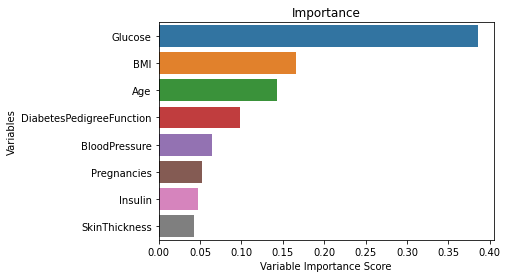

In [81]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [82]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)
gbm_model

GradientBoostingClassifier()

In [83]:
y_pred = gbm_model.predict(X_test)


In [84]:
accuracy_score(y_test,y_pred)


0.7489177489177489

In [85]:
gbm_params = {"learning_rate":[0.1,0.01],
             "max_depth":[3,5],
             "n_estimators":[1000,500]}

In [86]:
gbm = GradientBoostingClassifier()


In [87]:
gbm_cv_model = GridSearchCV(gbm,gbm_params,cv=10,
                            n_jobs=-1,verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [88]:
gbm_cv_model.best_params_


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [94]:
gbm_tuned = GradientBoostingClassifier(learning_rate =0.01,
                                     max_depth = 5,
                                     n_estimators=500).fit(X_train,y_train)

In [95]:
y_pred = gbm_tuned.predict(X_test)


In [96]:
accuracy_score(y_test,y_pred)


0.7316017316017316

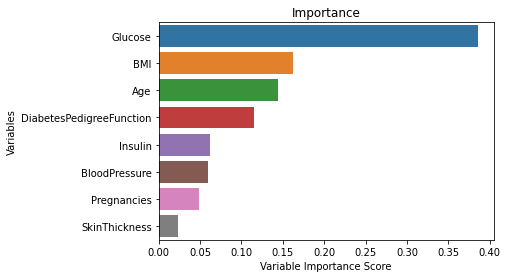

In [97]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [104]:
import xgboost
from xgboost import XGBClassifier

In [105]:
xgb = XGBClassifier().fit(X_train,y_train)
xgb

XGBClassifier()

In [106]:
y_pred = xgb.predict(X_test)


In [107]:
accuracy_score(y_test,y_pred)


0.7489177489177489

In [108]:
xgb = XGBClassifier()
xgb_params = {"learning_rate": [0.1,0.01] ,
             "max_depth":[4,5,8],
             "n_estimators":[100,500],
             "subsample":[0.5,1]}

In [109]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,
                            n_jobs =-1,verbose =2).fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [110]:
xgb_cv_model.best_params_


{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}

In [112]:
xgb_tuned = XGBClassifier(subsample=0.5,
                        learning_rate=0.01,
                        max_depth=8,
                        n_estimators=100).fit(X_train,y_train)

In [113]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)


0.7489177489177489

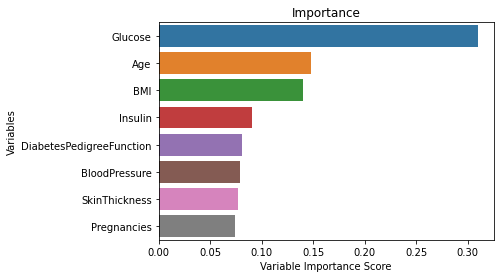

In [114]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [115]:
from lightgbm import LGBMClassifier


In [116]:
lgb_model = LGBMClassifier().fit(X_train,y_train)
lgb_model

LGBMClassifier()

In [117]:
y_pred = lgb_model.predict(X_test)


In [118]:
accuracy_score(y_test,y_pred)


0.7272727272727273

In [119]:
lgb = LGBMClassifier()


In [120]:
lgbm_params = {"learning_rate": [0.01,0.1,0.5,1],
              "n_estimators":[40,100,1000],
              "max_depth":[-1,1,2,3]}

In [121]:
lgbm_cv_model = GridSearchCV(lgb,lgbm_params,cv = 10,n_jobs =-1,
                            verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [122]:
lgbm_cv_model.best_params_


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 40}

In [123]:
lgb_tuned = LGBMClassifier(learning_rate=0.1,
                         max_depth=1,
                         n_estimators=40).fit(X_train,y_train)

In [124]:
y_pred = lgb_tuned.predict(X_test)


In [125]:
accuracy_score(y_test,y_pred)


0.7575757575757576

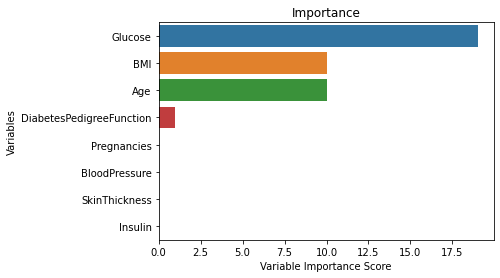

In [126]:
feature_imp = pd.Series(lgb_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [130]:
pip install CatBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [134]:
from catboost import CatBoostClassifier


In [135]:
catb_model = CatBoostClassifier().fit(X_train,y_train)


Learning rate set to 0.0079
0:	learn: 0.6879744	total: 47.3ms	remaining: 47.2s
1:	learn: 0.6843414	total: 48.9ms	remaining: 24.4s
2:	learn: 0.6805760	total: 53.2ms	remaining: 17.7s
3:	learn: 0.6765782	total: 54.8ms	remaining: 13.7s
4:	learn: 0.6720829	total: 59.8ms	remaining: 11.9s
5:	learn: 0.6681617	total: 62.7ms	remaining: 10.4s
6:	learn: 0.6641912	total: 65.6ms	remaining: 9.31s
7:	learn: 0.6602881	total: 68.6ms	remaining: 8.5s
8:	learn: 0.6562626	total: 71.4ms	remaining: 7.86s
9:	learn: 0.6528483	total: 74.2ms	remaining: 7.35s
10:	learn: 0.6487823	total: 77.7ms	remaining: 6.99s
11:	learn: 0.6454980	total: 79.5ms	remaining: 6.55s
12:	learn: 0.6418953	total: 82.5ms	remaining: 6.26s
13:	learn: 0.6374431	total: 85.4ms	remaining: 6.01s
14:	learn: 0.6339676	total: 88.2ms	remaining: 5.79s
15:	learn: 0.6304252	total: 91ms	remaining: 5.6s
16:	learn: 0.6266998	total: 93.9ms	remaining: 5.43s
17:	learn: 0.6237660	total: 98.1ms	remaining: 5.35s
18:	learn: 0.6204394	total: 103ms	remaining: 5.3s


In [136]:
y_pred = catb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

In [137]:
catb = CatBoostClassifier()


In [138]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01,0.1],
              "depth":[3,6,8]}

In [139]:
catb_cv_model = GridSearchCV(catb,
                          catb_params,
                          cv=5,
                          n_jobs=-1,
                          verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863312	total: 3.04ms	remaining: 606ms
1:	learn: 0.6811157	total: 6.16ms	remaining: 610ms
2:	learn: 0.6752970	total: 8.43ms	remaining: 554ms
3:	learn: 0.6697432	total: 10.7ms	remaining: 527ms
4:	learn: 0.6641758	total: 13.2ms	remaining: 513ms
5:	learn: 0.6576656	total: 15.3ms	remaining: 495ms
6:	learn: 0.6521870	total: 17.8ms	remaining: 491ms
7:	learn: 0.6465564	total: 20.2ms	remaining: 485ms
8:	learn: 0.6407595	total: 22.7ms	remaining: 482ms
9:	learn: 0.6357725	total: 25.1ms	remaining: 477ms
10:	learn: 0.6299942	total: 27.5ms	remaining: 473ms
11:	learn: 0.6240480	total: 30ms	remaining: 470ms
12:	learn: 0.6196095	total: 32.5ms	remaining: 467ms
13:	learn: 0.6148715	total: 35ms	remaining: 465ms
14:	learn: 0.6092626	total: 37.6ms	remaining: 463ms
15:	learn: 0.6046764	total: 40ms	remaining: 460ms
16:	learn: 0.6012725	total: 42.4ms	remaining: 456ms
17:	learn: 0.5958121	total: 44.9ms	remaining: 454ms
18:	learn: 0.590324

In [140]:
catb_cv_model.best_params_


{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [141]:
catb_tuned = CatBoostClassifier(depth=8,
                              iterations=200,
                              learning_rate=0.01).fit(X_train,y_train)

0:	learn: 0.6863312	total: 2.98ms	remaining: 593ms
1:	learn: 0.6811157	total: 5.84ms	remaining: 578ms
2:	learn: 0.6752970	total: 8.31ms	remaining: 546ms
3:	learn: 0.6697432	total: 10.8ms	remaining: 529ms
4:	learn: 0.6641758	total: 13.3ms	remaining: 519ms
5:	learn: 0.6576656	total: 15.8ms	remaining: 510ms
6:	learn: 0.6521870	total: 18.3ms	remaining: 503ms
7:	learn: 0.6465564	total: 20.7ms	remaining: 496ms
8:	learn: 0.6407595	total: 23.4ms	remaining: 496ms
9:	learn: 0.6357725	total: 26.6ms	remaining: 505ms
10:	learn: 0.6299942	total: 29ms	remaining: 499ms
11:	learn: 0.6240480	total: 31.4ms	remaining: 493ms
12:	learn: 0.6196095	total: 33.9ms	remaining: 488ms
13:	learn: 0.6148715	total: 36.4ms	remaining: 484ms
14:	learn: 0.6092626	total: 38.9ms	remaining: 480ms
15:	learn: 0.6046764	total: 41.3ms	remaining: 475ms
16:	learn: 0.6012725	total: 43.7ms	remaining: 471ms
17:	learn: 0.5958121	total: 46.2ms	remaining: 468ms
18:	learn: 0.5903243	total: 48.6ms	remaining: 463ms
19:	learn: 0.5866024	tot

In [144]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

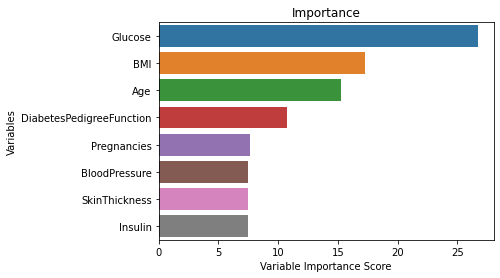

In [143]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()

In [145]:
modeller = [knn_tuned,
           loj_model,
           svm_tuned,
           mlp_tuned,
           cart_tuned,
           rf_tuned,
           gbm_tuned,
           catb_tuned,
           lgb_tuned,
            xgb_tuned]
sonuc = []
sonuclar = pd.DataFrame(columns = ["Modeller","Accuracy"])
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    sonuc = pd.DataFrame([[isimler,dogruluk*100]],columns = ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

In [148]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,75.324675
0,SVC,74.458874
0,MLPClassifier,74.891775
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.458874
0,GradientBoostingClassifier,73.160173
0,CatBoostClassifier,75.324675
0,LGBMClassifier,75.757576
0,XGBClassifier,74.891775


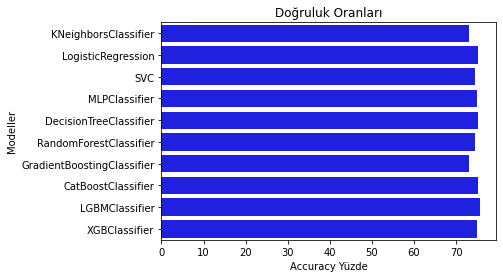

In [149]:
sns.barplot(x="Accuracy",y="Modeller",data=sonuclar,color="b")
plt.xlabel("Accuracy Yüzde")
plt.title("Doğruluk Oranları");